# Data Cleaning

Our dataset found from Kaggle contains human written essays and AI generated essays. We will split these essays into sentences and into words. Punctuation and capitalization most likely has a big impact on determining if a text AI generated or human written. We will create a cleaned version and the original version where we keep the punctuations and not normalized.

In [ ]:
from google.colab import drive
import pandas as pd
from tqdm import tqdm
import re

In [ ]:
# AI-Generated Text from the Kaggle Discussion page
drive.mount('/content/drive')
ai_text = "/content/drive/My Drive/CS505/train_drcat_04.csv"

df = pd.read_csv(ai_text)

Mounted at /content/drive


In [ ]:
X = df['text']
Y = df['label']

In [ ]:
X

0         In recent years, technology has had a profoun...
1        Should students participate in an extracurricu...
2        The electoral college is a symbol of mockery a...
3        This is why I think the principle should allow...
4        I strongly believe that meditation and mindful...
                               ...                        
44201    "Oh man I didn't make the soccer team!", yelle...
44202    I believe that using this technology could be ...
44203    The Face on Mars is a fascinating phenomenon t...
44204    Texting & Driving\n\nUsing your phone while dr...
44205    Dear Principal,\n\nI have been really good thi...
Name: text, Length: 44206, dtype: object

In [ ]:
Y

0        1
1        0
2        0
3        0
4        1
        ..
44201    0
44202    0
44203    1
44204    0
44205    0
Name: label, Length: 44206, dtype: int64

In [ ]:
normal_essays = []
cleaned_essays = []

# X contains 44205 essays
# X[0] -->  0 In recent years, technology has had a profoun...
for essay in X:

    # We want to split X into SENTENCES (using . , ! ?)

    # Don't delete sentences2. re.split returns pointer
    sentences1 = re.split(r'[.?!]\s*', essay)
    sentences2 = re.split(r'[.?!]\s*', essay)

    # split into sentences for each essay and append each modified essay into a bigger list
    normal_essays.append(sentences1)
    cleaned_essays.append(sentences2)

for n_essay in normal_essays:
    for i in range(len(n_essay)):
        n_essay[i] = n_essay[i] + "."

print(normal_essays[0])
print(cleaned_essays[0])

for i in range(len(normal_essays)): # each essay
    for j in range(len(normal_essays[i])): # each sentence
        normal_essays[i][j] = normal_essays[i][j].split()
        cleaned_essays[i][j] = cleaned_essays[i][j].split()

for i in tqdm(range(len(normal_essays))): # each essay
    for j in range(len(normal_essays[i])): # each sentence
        for k in range(len(cleaned_essays[i][j])): # each word
            cleaned_essays[i][j][k] = cleaned_essays[i][j][k].lower()
            cleaned_essays[i][j][k] = re.sub('[.,;:?!"]', '', cleaned_essays[i][j][k])

        # after cleaning all words, join them together
        text = ' '.join(normal_essays[i][j])
        normal_essays[i][j] = re.findall(r'\w+|[.,?!:;"\'-]', text)

[' In recent years, technology has had a profound impact on our daily lives and the world around us.', 'From staying connected with loved ones to ordering food online through an app, technology has made our lives easier and more convenient.', 'However, with great power comes great responsibility, and technology can also have negative consequences if used improperly.', 'One example of this is the spread of misinformation through the internet.', "It's easy to find articles and sources that may not be accurate or reliable, which can lead to confusion and even harm.", 'Additionally, technology can also pose a threat to our privacy and security if we are not careful about the websites and apps we use.', 'Despite these potential drawbacks, I believe that technology can be a powerful tool for achieving great things.', 'For example, technology has revolutionized the way we learn and access information.', 'With the internet, we can easily find resources and information on any topic, making it e

100%|██████████| 44206/44206 [00:40<00:00, 1082.47it/s]


In [ ]:
print(f"Cleaned Words: {cleaned_essays[0]}\n")
print(f"Regular Words: {normal_essays[0]}\n")

Cleaned Words: [['in', 'recent', 'years', 'technology', 'has', 'had', 'a', 'profound', 'impact', 'on', 'our', 'daily', 'lives', 'and', 'the', 'world', 'around', 'us'], ['from', 'staying', 'connected', 'with', 'loved', 'ones', 'to', 'ordering', 'food', 'online', 'through', 'an', 'app', 'technology', 'has', 'made', 'our', 'lives', 'easier', 'and', 'more', 'convenient'], ['however', 'with', 'great', 'power', 'comes', 'great', 'responsibility', 'and', 'technology', 'can', 'also', 'have', 'negative', 'consequences', 'if', 'used', 'improperly'], ['one', 'example', 'of', 'this', 'is', 'the', 'spread', 'of', 'misinformation', 'through', 'the', 'internet'], ["it's", 'easy', 'to', 'find', 'articles', 'and', 'sources', 'that', 'may', 'not', 'be', 'accurate', 'or', 'reliable', 'which', 'can', 'lead', 'to', 'confusion', 'and', 'even', 'harm'], ['additionally', 'technology', 'can', 'also', 'pose', 'a', 'threat', 'to', 'our', 'privacy', 'and', 'security', 'if', 'we', 'are', 'not', 'careful', 'about',

# PCA + K Means Clustering

We will be using PCA to map out both essays. We will then use K-Means clustering to assign each cluster to either AI generated or human made and see if this can detect AI text.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
cmap = mcolors.ListedColormap(['blue', 'red'])

In [ ]:
vectorizer = CountVectorizer()
n_essays_str_ls = []

for index, essay in enumerate(normal_essays):
    n_essays_str_ls.append("")
    for sentence in essay:
        text = ' '.join(sentence)
        n_essays_str_ls[index] += text

vectorizer = CountVectorizer()
doc_word_matrix = vectorizer.fit_transform(n_essays_str_ls)

In [ ]:
n_essays_str_ls[0]

"In recent years , technology has had a profound impact on our daily lives and the world around us .From staying connected with loved ones to ordering food online through an app , technology has made our lives easier and more convenient .However , with great power comes great responsibility , and technology can also have negative consequences if used improperly .One example of this is the spread of misinformation through the internet .It ' s easy to find articles and sources that may not be accurate or reliable , which can lead to confusion and even harm .Additionally , technology can also pose a threat to our privacy and security if we are not careful about the websites and apps we use .Despite these potential drawbacks , I believe that technology can be a powerful tool for achieving great things .For example , technology has revolutionized the way we learn and access information .With the internet , we can easily find resources and information on any topic , making it easier to stay 

In [ ]:
pca = TruncatedSVD(n_components=2)
result = pca.fit_transform(doc_word_matrix)

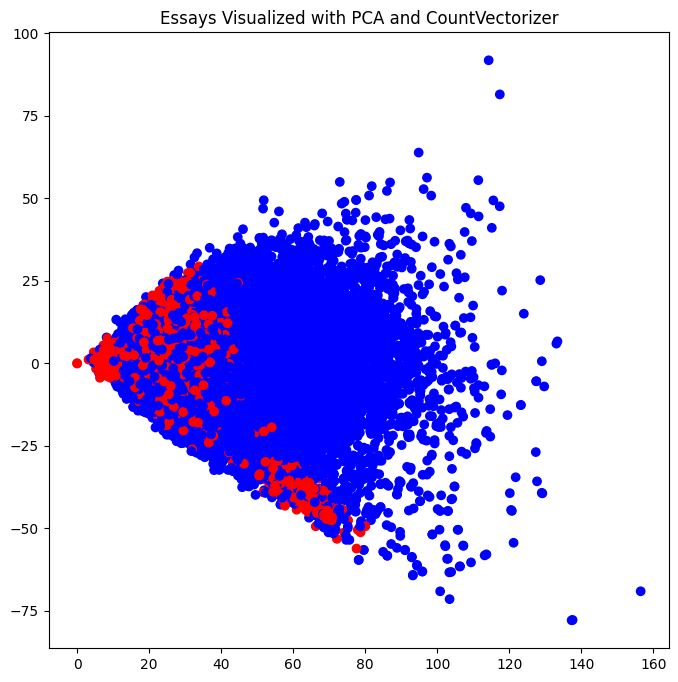

In [ ]:
# Blue = Human; Red = AI
plt.figure(figsize=(8, 8))
plt.title("Essays Visualized with PCA and CountVectorizer")
plt.scatter(result[:, 0], result[:, 1], c=Y, cmap=cmap)
plt.show()

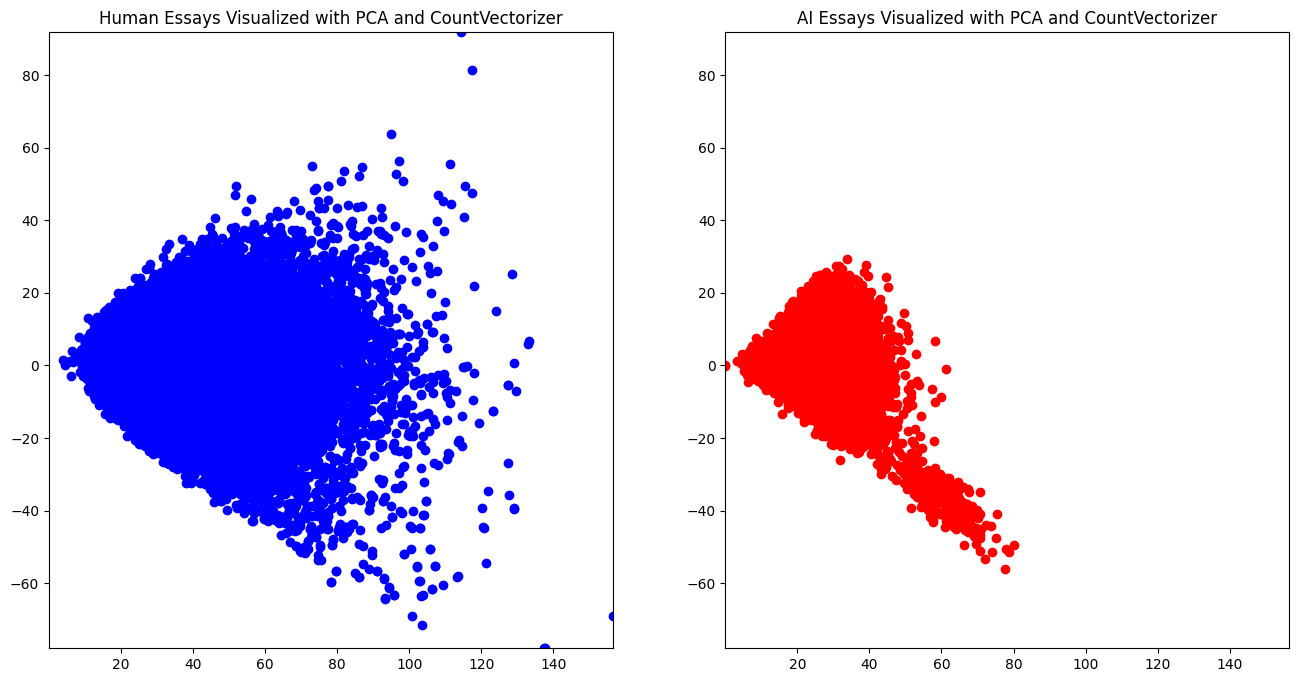

In [ ]:
x_min, x_max = np.min(result[:, 0]), np.max(result[:, 0])
y_min, y_max = np.min(result[:, 1]), np.max(result[:, 1])

label = 0
filtered_points = result[Y == label]
fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns
axs[0].scatter(filtered_points[:, 0], filtered_points[:, 1], c='blue')
axs[0].set_title("Human Essays Visualized with PCA and CountVectorizer")
axs[0].set_xlim(x_min, x_max)
axs[0].set_ylim(y_min, y_max)

label = 1
filtered_points = result[Y == label]
axs[1].scatter(filtered_points[:, 0], filtered_points[:, 1], c='red')
axs[1].set_title("AI Essays Visualized with PCA and CountVectorizer")
axs[1].set_xlim(x_min, x_max)
axs[1].set_ylim(y_min, y_max)

# Show the plots
plt.show()

In [ ]:
labels = np.array(Y)
data = np.array(result)

unique, counts = np.unique(Y, return_counts=True)
label_counts = dict(zip(unique, counts))

min_count = min(label_counts.values())
human_labels = []

balanced_data = []
balanced_labels = []
for label in unique:
    indices = np.where(labels == label)[0]

    sampled_indices = np.random.choice(indices, min_count, replace=False)
    if len(human_labels) == 0:
        human_labels = sampled_indices

    balanced_data.append(data[sampled_indices])
    balanced_labels.append(labels[sampled_indices])

balanced_data = np.vstack(balanced_data)
balanced_labels = np.concatenate(balanced_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


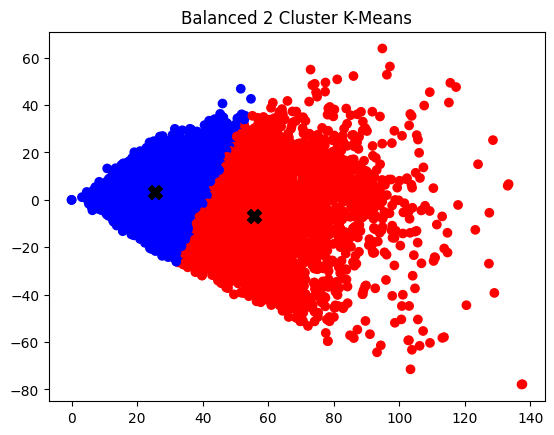

In [ ]:
balanced_kmeans = KMeans(n_clusters=2)

balanced_kmeans.fit(balanced_data)

balanced_kmeans_labels = balanced_kmeans.labels_
balanced_centroids = balanced_kmeans.cluster_centers_

plt.scatter(balanced_data[:, 0], balanced_data[:, 1], c=balanced_kmeans_labels, cmap=cmap)
plt.scatter(balanced_centroids[:, 0], balanced_centroids[:, 1], c='black', s=100, marker='X')
plt.title('Balanced 2 Cluster K-Means')
plt.show()

In [ ]:
correct_human = 0
total_human = 0

correct_ai = 0
total_ai = 0

for i in range(len(data)):
    new_data_point = np.array(data[i])

    distances = np.sqrt(np.sum((balanced_centroids - new_data_point) ** 2, axis=1))

    nearest_cluster_index = np.argmin(distances)

    assigned_cluster = nearest_cluster_index
    if labels[i] == 0: # Human
        if assigned_cluster != labels[i]:  # We put not equal as the K-means algorithm put the left
                                           # cluster as the human cluster, even though it should be AI cluster
            correct_human += 1
        total_human += 1
    elif labels[i] == 1: # AI
        if assigned_cluster != labels[i]: # We put not equal as the K-means algorithm put the right
                                          # cluster as the AI cluster, even though it should be human cluster
            correct_ai += 1
        total_ai += 1

print(f'Human Essay Accuracy: {correct_human / total_human * 100}%')
print(f'AI Essay Accuracy: {correct_ai / total_ai * 100}%')
print(f'Total Essay Accuracy: {(correct_human + correct_ai) / (total_ai + total_human) * 100}%')

Human Essay Accuracy: 32.61278195488722%
AI Essay Accuracy: 95.2962397668933%
Total Essay Accuracy: 53.05162195177125%


# Perplexity + Logistic Regression

We will be using perplexity and predicting if the words chosen are AI generated or not through its perplexity score. Our theory is that since AI is

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from tqdm import tqdm

In [ ]:
sentences_labels = []
for essay, label in zip(cleaned_essays, Y):
    for sentence in essay:
        if len(sentence) == 0:
            continue
        curr_sent = []
        for word in sentence:
            if word != '':
                curr_sent.append(word)
        sentences_labels.append((curr_sent, label))
np.random.shuffle(sentences_labels)

# We need to balance the number of sentences as logisitic model resorts to only predicting 0.

# Optional: If you want to separate the sentences and labels after shuffling
sentences = [sent for sent, _ in sentences_labels]
labels = [label for _, label in sentences_labels]

label_count = {0 : 0, 1 : 0}

for l in labels:
    label_count[l] += 1
min_key = min(label_count, key=label_count.get)

min_label_count = label_count[min_key]

training_sents = []
training_labels = []
human_train_count = 0
ai_train_count = 0
for i in range(len(sentences)):
    if labels[i] == 0:
        if human_train_count < min_label_count * 0.99 - 1:
            training_sents.append(sentences[i])
            training_labels.append(labels[i])
            human_train_count += 1
    elif labels[i] == 1:
        if ai_train_count < min_label_count * 0.99 - 1:

    if labels[i] == 1 and ai_train_count < min_label_count * 0.99 - 1:

training_labels = []

# We use 5% rather than usual 20% or 10% as calculating perplexity on sentence in testing set takes way too long (2-3 hours)
training_sents = [sent for i, sent in enumerate(sentences) if i < len(sentences) * 0.99 - 1]
training_labels = [label for i, label in enumerate(labels) if i < len(labels) * 0.99 - 1]
testing_sents = [sent for i, sent in enumerate(sentences) if i >= len(sentences) * 0.99 - 1]
testing_labels = [label for i, label in enumerate(labels) if i >= len(labels) * 0.99 - 1]

print(f"Length training set: {len(training_sents)}")
print(f"Length testing set: {len(testing_sents)}\n")
print(f"Start of training set:\n{training_sents[0]}\n")
print(f"Start of testing set:\n{testing_sents[0]}")

1
254918
Length training set: 877490
Length testing set: 8864

Start of training set:
['there', 'are', 'a', 'few', 'key', 'reasons', 'for', 'this']

Start of testing set:
['while', 'some', 'students', 'may', 'prefer', 'to', 'have', 'a', 'elective', 'class', 'because', 'they', 'are', 'learning', 'what', 'they', 'like', 'and', 'will', 'be', 'less', 'difficult', 'for', 'them', 'to', 'understand', 'the', 'class', 'others', 'may', 'not', 'be', 'as', 'enthusiastic', 'about', 'the', 'idea']


In [ ]:
# put `<s>` at beginning and `</s>` at end of all sentences.

def bracket_sentence(sent):
    sent.insert(0, '<s>')
    sent.append('</s>')

for i in range(len(training_sents)):
    bracket_sentence(training_sents[i])

for i in range(len(testing_sents)):
    bracket_sentence(testing_sents[i])

print(f"Start of training set:\n{training_sents[0]}\n")
print(f"Start of testing set:\n{testing_sents[0]}")

Start of training set:
['<s>', 'there', 'are', 'companies', 'that', 'have', 'plans', 'on', 'releasing', 'cars', 'that', 'can', 'drive', 'themselves', 'in', 'the', 'future', 'whether', 'or', 'not', 'its', 'supported', 'by', 'the', 'pubilc', '</s>']

Start of testing set:
['<s>', 'it', 'would', 'be', 'a', 'great', 'advantage', 'for', 'students', 'to', 'have', 'that', 'offer', 'of', 'distance', 'learning', 'it', 'woud', 'make', 'a', 'huge', 'difference', 'for', 'the', 'generation', 'of', 'students', 'now', 'a', 'day', '</s>']


In [ ]:
def get_Ngrams_for_sentence(N,s):
    ls = []
    for i in range(0, len(s) - N + 1):
        temp = []
        for j in range(i, i + N):
            temp.append(s[j])
        ls.append(tuple(temp))
    return ls

print(get_Ngrams_for_sentence(1, training_sents[0]))
print()
print(get_Ngrams_for_sentence(2, training_sents[0]))
print()
print(get_Ngrams_for_sentence(3, training_sents[0]))
print()
print(get_Ngrams_for_sentence(4, training_sents[0]))

[('<s>',), ('there',), ('are',), ('companies',), ('that',), ('have',), ('plans',), ('on',), ('releasing',), ('cars',), ('that',), ('can',), ('drive',), ('themselves',), ('in',), ('the',), ('future',), ('whether',), ('or',), ('not',), ('its',), ('supported',), ('by',), ('the',), ('pubilc',), ('</s>',)]

[('<s>', 'there'), ('there', 'are'), ('are', 'companies'), ('companies', 'that'), ('that', 'have'), ('have', 'plans'), ('plans', 'on'), ('on', 'releasing'), ('releasing', 'cars'), ('cars', 'that'), ('that', 'can'), ('can', 'drive'), ('drive', 'themselves'), ('themselves', 'in'), ('in', 'the'), ('the', 'future'), ('future', 'whether'), ('whether', 'or'), ('or', 'not'), ('not', 'its'), ('its', 'supported'), ('supported', 'by'), ('by', 'the'), ('the', 'pubilc'), ('pubilc', '</s>')]

[('<s>', 'there', 'are'), ('there', 'are', 'companies'), ('are', 'companies', 'that'), ('companies', 'that', 'have'), ('that', 'have', 'plans'), ('have', 'plans', 'on'), ('plans', 'on', 'releasing'), ('on', 'rel

In [ ]:
Ngrams = [None]*5

Ngrams[1] = []
Ngrams[2] = []
Ngrams[3] = []
Ngrams[4] = []

for sent in training_sents:
    for i in range(1, 5):
        for tup in get_Ngrams_for_sentence(i, sent):
            Ngrams[i].append(tup)


print(f"There are {len(Ngrams[1])} N-grams in Ngrams[1] and the first 5 are:\n{Ngrams[1][0:5]}\n")
print(f"There are {len(Ngrams[2])} N-grams in Ngrams[2] and the first 5 are:\n{Ngrams[2][0:5]}\n")
print(f"There are {len(Ngrams[3])} N-grams in Ngrams[3] and the first 5 are:\n{Ngrams[3][0:5]}\n")
print(f"There are {len(Ngrams[4])} N-grams in Ngrams[4] and the first 5 are:\n{Ngrams[4][0:5]}\n")

There are 18659551 N-grams in Ngrams[1] and the first 5 are:
[('<s>',), ('there',), ('are',), ('companies',), ('that',)]

There are 17782061 N-grams in Ngrams[2] and the first 5 are:
[('<s>', 'there'), ('there', 'are'), ('are', 'companies'), ('companies', 'that'), ('that', 'have')]

There are 16904571 N-grams in Ngrams[3] and the first 5 are:
[('<s>', 'there', 'are'), ('there', 'are', 'companies'), ('are', 'companies', 'that'), ('companies', 'that', 'have'), ('that', 'have', 'plans')]

There are 16028018 N-grams in Ngrams[4] and the first 5 are:
[('<s>', 'there', 'are', 'companies'), ('there', 'are', 'companies', 'that'), ('are', 'companies', 'that', 'have'), ('companies', 'that', 'have', 'plans'), ('that', 'have', 'plans', 'on')]



In [ ]:
# Create a defaultdict with the frequency distribution for the training set for a given N.
from collections import defaultdict

def def_value():
    return 0

def get_Ngram_distribution(N,Ngrams):
    dic = defaultdict(def_value)
    for tup in Ngrams[N]:
        dic[tup] = dic[tup] + 1

    return dic

Ngram_distribution = [None]*5

for i in range(1,5):
    Ngram_distribution[i] = get_Ngram_distribution(i, Ngrams)
    for j in Ngram_distribution[i]:
        Ngram_distribution[i][j] /= len(Ngrams[i])

Ngram_distribution[1][('<s>',)] = 1



print(f"The Probability of ('<s>',) is {round(Ngram_distribution[1][tuple(['<s>'])], 8)}\n")

print(f"The Probability of ('to',) is {round(Ngram_distribution[1][tuple(['to'])], 8)}\n")

print(f"The Probability of ('to','the') is {round(Ngram_distribution[2][tuple(['to', 'the'])], 8)}\n")

print(f"The Probability of ('to','the','house') is {round(Ngram_distribution[3][tuple(['to', 'the', 'house'])], 8)}\n")

print(f"The Probability of ('to','the','house','.') is {round(Ngram_distribution[4][tuple(['to', 'the', 'house', '.'])], 8)}")

The Probability of ('<s>',) is 1

The Probability of ('to',) is 0.03359572

The Probability of ('to','the') is 0.00158159

The Probability of ('to','the','house') is 1.662e-05

The Probability of ('to','the','house','.') is 0


In [ ]:
words = []
for sent in sentences:
    for word in sent:
        words.append(word)

print(len(words))

18847683


In [ ]:
def PN_with_stupid_backoff(N,W):
    if N == 1:
        if Ngram_distribution[1][W] == 0:
            return words.count(W[0]) / len(words)
        else:
            return Ngram_distribution[1][W]
    else:
        if Ngram_distribution[N][W] == 0:
            return 0.4 * PN_with_stupid_backoff(N - 1, W[1:])
        else:
            return Ngram_distribution[N][W] / PN_with_stupid_backoff(N-1,W[:-1])

def P_stupid_backoff(N,W):
    ans = 1
    for i in range(2, N):
        ans *= PN_with_stupid_backoff(i,W[:i])

    for i in range(len(W) - N + 1):
        ans *= PN_with_stupid_backoff(N,W[i:i+N])
    return ans

def PP(N,W):
    ans = 1
    if len(W) < N:
        return round(1 / P_stupid_backoff(len(W), W), 2)
    ans *= P_stupid_backoff(N, W)
    ans = ans ** -(1/(len(W) - 1))

    return round(ans, 2)

In [ ]:
import math

def PN_with_stupid_backoff(N, W):
    if N == 1:
        if Ngram_distribution[1][W] == 0:
            return math.log(words.count(W[0]) / len(words))
        else:
            return math.log(Ngram_distribution[1][W])
    else:
        if Ngram_distribution[N][W] == 0:
            return math.log(0.4) + PN_with_stupid_backoff(N - 1, W[1:])
        else:
            return math.log(Ngram_distribution[N][W]) - PN_with_stupid_backoff(N - 1, W[:-1])

def P_stupid_backoff(N, W):
    log_ans = 0
    for i in range(2, N):
        log_ans += PN_with_stupid_backoff(i, W[:i])

    for i in range(len(W) - N + 1):
        log_ans += PN_with_stupid_backoff(N, W[i:i+N])

    return log_ans

def PP(N, W):
    if len(W) < N:
        return round(math.exp(-P_stupid_backoff(len(W), W)), 2)

    log_ans = P_stupid_backoff(N, W)
    log_ans = -log_ans / (len(W) - 1)

    return round(math.exp(log_ans), 2)


In [ ]:
training_pp = []
for sent in tqdm(training_sents):
    training_pp.append(PP(3, tuple(sent)))
for i in range(10):
    print(training_pp[i])
    print(f"{' '.join(training_sents[i][1:-1])}")

100%|██████████| 877490/877490 [01:37<00:00, 8958.90it/s] 

7363.07
there are companies that have plans on releasing cars that can drive themselves in the future whether or not its supported by the pubilc
5599.08
if you take debate team you could meet new people that you have never meet
14524.48
just don't sit there like a bump on a log and be the drawl and boring person most people are today
2325.87
dear senator i am writing to express my view that the united states should change from the electoral college system to electing the president by popular vote
9867.13
so please if your going to change requirements to a b average at least give athletes study hall
5671.84
it helps students stay on track and keeps parents involved in their child's education
7584.28
by allowing students to choose their own project and design it however they see fit students will be opened up to a whole new spectrum of ideas to explore
5823.22
vabuan's families don't own cars and 57 percent sold their car to move there
5238.23
they can help people in need improve mental 

In [ ]:
testing_pp = []
for sent in tqdm(testing_sents):
    testing_pp.append(PP(3, tuple(sent)))
for i in range(10):
    print(testing_pp[i])
    print(f"{' '.join(testing_sents[i][1:-1])}")

100%|██████████| 8864/8864 [09:27<00:00, 15.62it/s]

5765.74
it would be a great advantage for students to have that offer of distance learning it woud make a huge difference for the generation of students now a day
8218.08
peoples water resources might have been destoyred during the war
4526.68
it's a way to express what i see and think to create something beautiful and meaningful
4035.84
garvin ended his statement withthat's a lava dome that takes the form of an isolated mesa about the same height as the face on mars
6096.61
overall while the intentions are noble mandatory community service risks having the opposite of the intended effect
9764.76
the city of paris was engulfed in the choking air caused by the cars that conjested the streets
3615.62
dole was right all along
6991.22
research from children's hospital of philadelphia (chop) says teens who do not frequently use a phone while driving believe the benefits of putting away their phone while driving outweigh any throwbacks
11335.12
those two only won 43% of their popular votes b

In [ ]:
print(len(training_pp))
print(len(training_labels))

In [ ]:
X = np.array(training_pp).reshape(-1, 1)

model = LogisticRegression()
model.fit(X, training_labels)

predictions = []
test = np.array(testing_pp).reshape(-1, 1)

sum(model.predict(test))

0